In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px


In [90]:
IBM_semfiltro = pd.read_csv('IBM.csv')

IBM = IBM_semfiltro.drop(columns=['EmployeeCount','StandardHours','Over18'])

IBM.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [91]:
IBM.loc[IBM['Attrition'] == 'Yes', 'Attrition'] = 1

IBM.loc[IBM['Attrition'] == 'No', 'Attrition'] = 0

In [92]:
corr_matrix=IBM.corr()
corr_matrix

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [93]:
IBM.iloc[:,0:20].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9


In [94]:
IBM.iloc[:,20:35].head()

,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,11,3,1,0,8,0,1,6,4,0,5
1,No,23,4,4,1,10,3,3,10,7,1,7
2,Yes,15,3,2,0,7,3,3,0,0,0,0
3,Yes,11,3,3,0,8,3,3,8,7,3,0
4,No,12,3,4,1,6,3,3,2,2,2,2


In [95]:
#with sns.axes_style('white'):
#    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
#                       hue='method', order=range(2001, 2015))
#    g.set_ylabels('Number of Planets Discovered')

In [96]:
#DataFrame Não Demitidos
NoAttrition = IBM.loc[(IBM['Attrition']==0)]
#DataFrame Demitidos
Attrition = IBM.loc[(IBM['Attrition']==1)]

In [97]:
#plt.figure(figsize=(13,5))
#plt.subplot(121)
#plt.hist(NoAttrition['YearsSinceLastPromotion'],bins=20, color='steelblue', density=True);
#plt.subplot(122)
#plt.hist(Attrition['YearsSinceLastPromotion'],bins=20, color='red', density=True);

In [98]:
IBM.iloc[:,0:20].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9


In [171]:
IBM.iloc[:,20:35].head()

,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,11,3,1,0,8,0,1,6,4,0,5
1,No,23,4,4,1,10,3,3,10,7,1,7
2,Yes,15,3,2,0,7,3,3,0,0,0,0
3,Yes,11,3,3,0,8,3,3,8,7,3,0
4,No,12,3,4,1,6,3,3,2,2,2,2


In [100]:
Attrition_RelationshipSatisfaction_JobInvolvement = pd.crosstab(Attrition['RelationshipSatisfaction'],Attrition['JobInvolvement'])

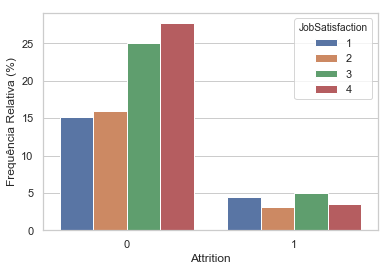

In [146]:
sns.barplot(x='Attrition',y="Attrition",hue="JobSatisfaction", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

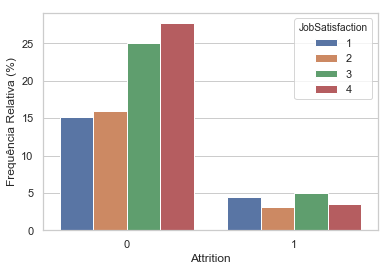

In [145]:
sns.barplot(x='Attrition',y="Attrition",hue="JobSatisfaction", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

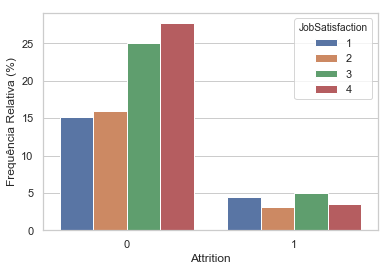

In [144]:

sns.barplot(x='Attrition',y="Attrition",hue="JobSatisfaction", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

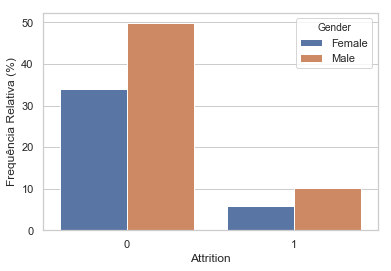

In [142]:
sns.barplot(x='Attrition',y="Attrition",hue="Gender", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

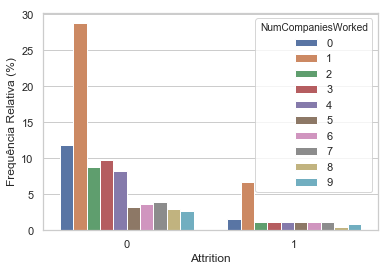

In [141]:
sns.barplot(x='Attrition',y="Attrition",hue="NumCompaniesWorked", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

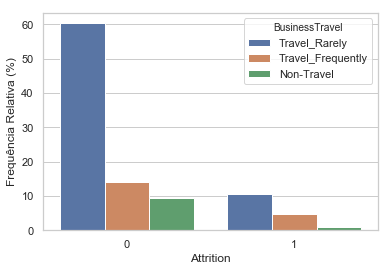

In [140]:
sns.barplot(x='Attrition',y="Attrition",hue="BusinessTravel", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

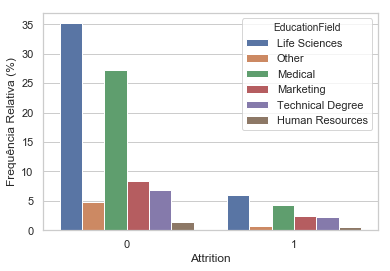

In [139]:
sns.barplot(x='Attrition',y="Attrition",hue="EducationField", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

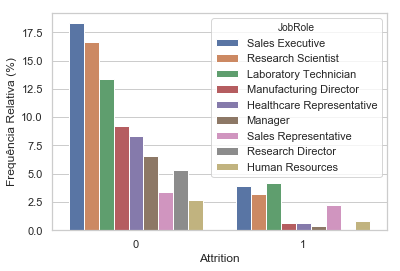

In [138]:
sns.barplot(x='Attrition',y="Attrition",hue="JobRole", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);

plt.ylabel('Frequência Relativa (%)');

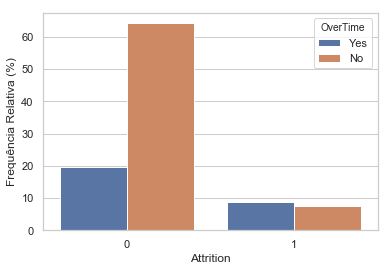

In [147]:
sns.barplot(x='Attrition',y="Attrition",hue="OverTime", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

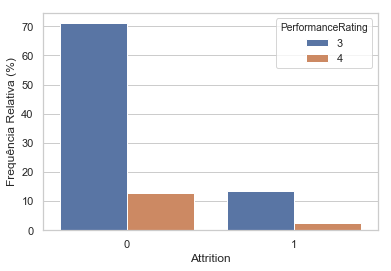

In [148]:
sns.barplot(x='Attrition',y="Attrition",hue="PerformanceRating", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

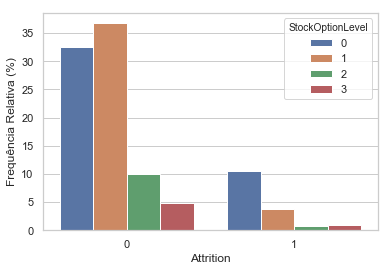

In [149]:
sns.barplot(x='Attrition',y="Attrition",hue="StockOptionLevel", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

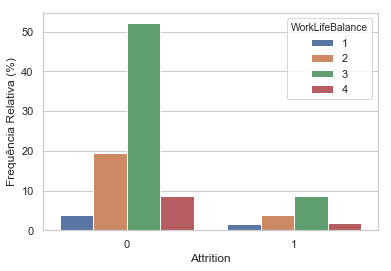

In [150]:
sns.barplot(x='Attrition',y="Attrition",hue="WorkLifeBalance", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

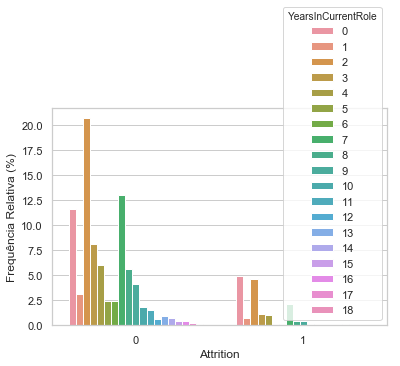

In [151]:
sns.barplot(x='Attrition',y="Attrition",hue="YearsInCurrentRole", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

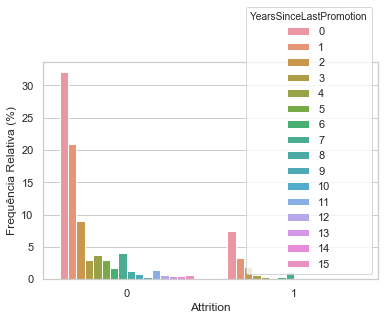

In [152]:
sns.barplot(x='Attrition',y="Attrition",hue="YearsSinceLastPromotion", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

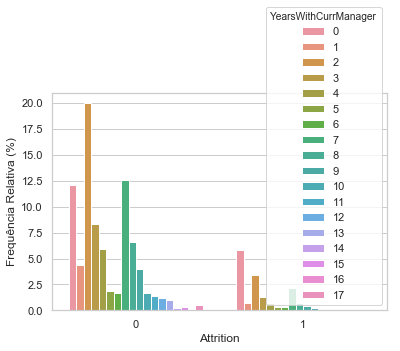

In [153]:
sns.barplot(x='Attrition',y="Attrition",hue="YearsWithCurrManager", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.ylabel('Frequência Relativa (%)');

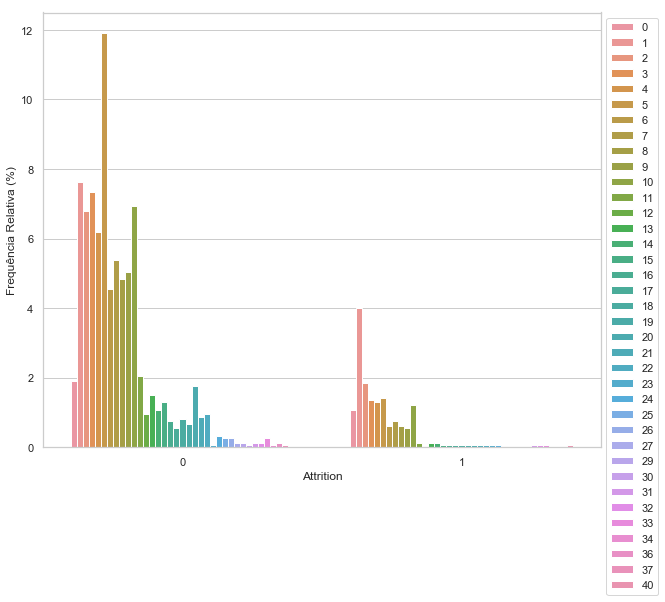

In [135]:
plt.figure(figsize=(10,8))
sns.barplot(x='Attrition',y="Attrition",hue="YearsAtCompany", data=IBM, estimator=lambda x: len(x) / len(IBM) * 100);
plt.legend(loc='best',bbox_to_anchor=(1,1))
plt.ylabel('Frequência Relativa (%)');

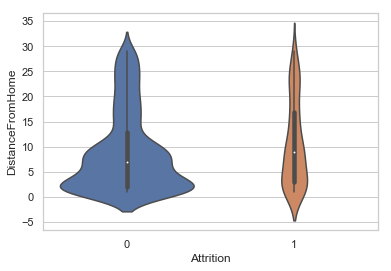

In [182]:
sns.violinplot(x="Attrition", y="DistanceFromHome", data=IBM, scale='count');

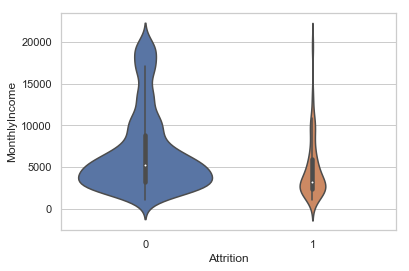

In [167]:
sns.violinplot(x="Attrition", y="MonthlyIncome", data=IBM,scale="count")

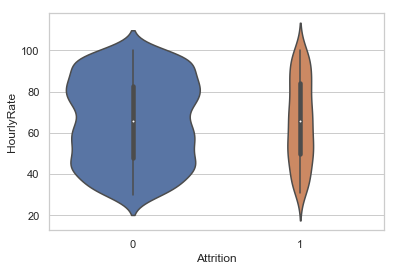

In [168]:
sns.violinplot(x="Attrition", y="HourlyRate", data=IBM,scale='count');

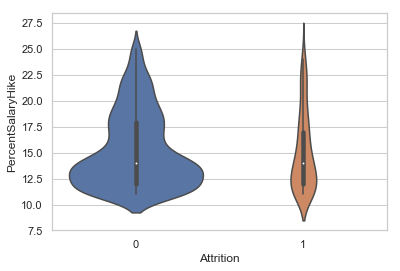

In [178]:
sns.violinplot(x="Attrition", y="PercentSalaryHike", data=IBM, scale='count')

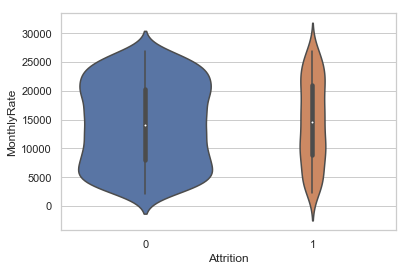

In [173]:
sns.violinplot(x="Attrition", y="MonthlyRate", data=IBM, scale='count')

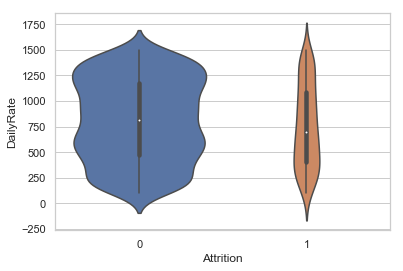

In [180]:
sns.violinplot(x="Attrition", y="DailyRate", data=IBM, scale='count');

In [123]:
x = IBM['Attrition']
y = IBM[['JobInvolvement','JobLevel','EnvironmentSatisfaction','DailyRate','Education','DistanceFromHome','Department','BusinessTravel','HourlyRate','MonthlyIncome']]


___
* ## **Decision Tree**

In [124]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [125]:
IBM.iloc[:,0:20].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9


In [126]:
IBM.iloc[:,20:35].head()

,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,11,3,1,0,8,0,1,6,4,0,5
1,No,23,4,4,1,10,3,3,10,7,1,7
2,Yes,15,3,2,0,7,3,3,0,0,0,0
3,Yes,11,3,3,0,8,3,3,8,7,3,0
4,No,12,3,4,1,6,3,3,2,2,2,2


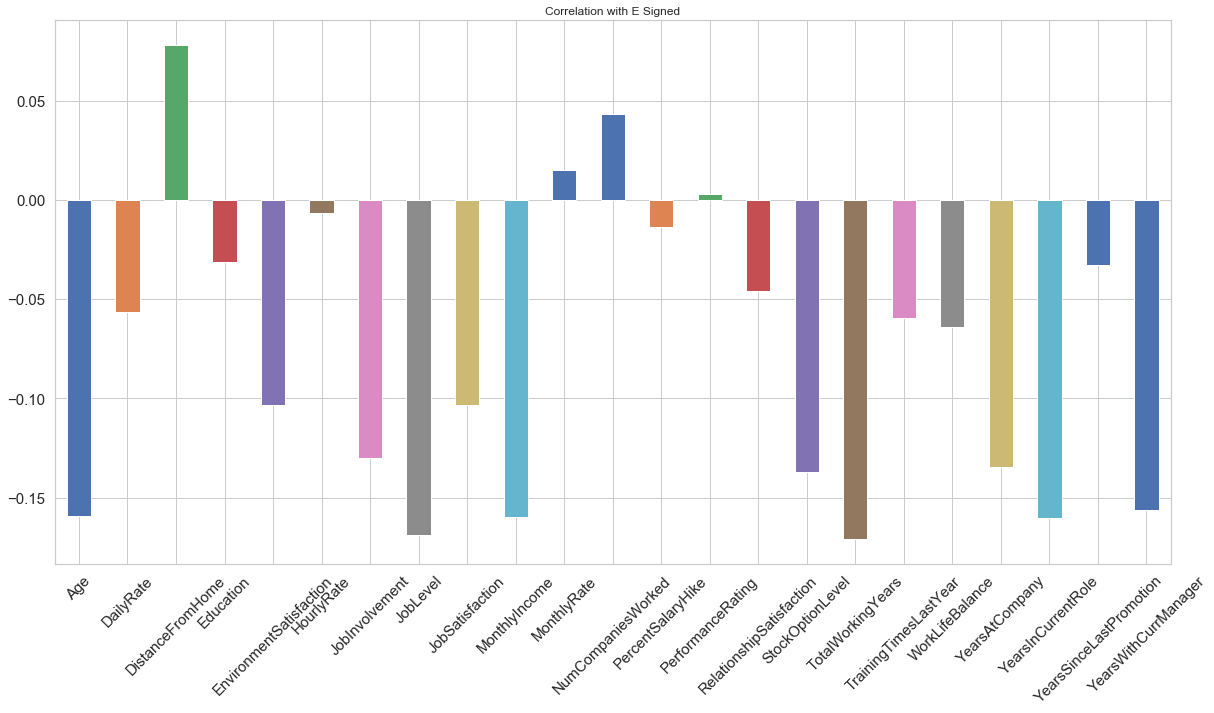

In [129]:
continuous_columns = ['Age','DailyRate','DistanceFromHome', 'Education', 'EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike',  'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager'] 
b=IBM[continuous_columns]

a=b.corrwith(IBM['Attrition']).plot.bar(
        figsize = (20,10), title = "Correlation with E Signed", fontsize = 15,
        rot = 45, grid = True)

In [131]:
X = IBM[['MonthlyIncome','Age','DistanceFromHome']]
y = IBM['Attrition']
decisiontree = tree.DecisionTreeClassifier(random_state=0, max_depth=2)
decisiontree = decisiontree.fit(X,y)